In [171]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')

In [63]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:80% !important;height:80% !important;</style>"
HTML(style)

In [64]:
titanic_data = pd.read_csv('train.csv')

titanic_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [67]:
X = X.fillna({'Age': X.Age.median()})

In [68]:
y = titanic_data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [69]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [70]:
X.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [71]:
X.shape

(891, 10)

In [72]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
#graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
#display(SVG(graph.pipe(format='svg')))

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [75]:
X_train.shape

(596, 10)

In [76]:
clf.score(X, y)


0.9797979797979798

In [77]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8169491525423729

In [78]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.8067796610169492

In [79]:
max_depth = 50
scores_data = pd.DataFrame()

In [80]:
def train(max_depth):
    scores_data = pd.DataFrame()
    for depth in range(1, max_depth):
        clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
        clf.fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
        temp_scores_data = pd.DataFrame({'max_depth': [depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross_val_score]})                    
        scores_data = scores_data.append(temp_scores_data)
    return scores_data

In [81]:
scores_data.head()

""


In [86]:
scores_data=train(max_depth)

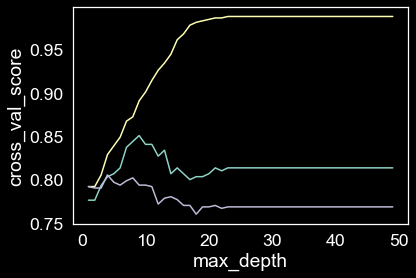

In [172]:
sns.lineplot(scores_data.max_depth, scores_data['test_score'])
sns.lineplot(scores_data.max_depth, scores_data['train_score'])
sns.lineplot(scores_data.max_depth, scores_data['cross_val_score'])

In [88]:
scores_changed = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name='score')
scores_changed.head()

,max_depth,set_type,score
0,1,train_score,0.791946
1,2,train_score,0.791946
2,3,train_score,0.805369
3,4,train_score,0.828859
4,5,train_score,0.838926


In [89]:
sns.lineplot(x='max_depth', y='score', data=scores_changed, hue='set_type', )

In [90]:
scores_changed[scores_changed['score']==scores_changed[scores_changed['set_type']=='cross_val_score']['score'].max()]

,max_depth,set_type,score
101,4,cross_val_score,0.805378


In [91]:
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8020448179271709

In [92]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
best_clf.fit(X_train, y_train)
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.8030586401714398

In [93]:
from sklearn.model_selection import GridSearchCV

clf = tree.DecisionTreeClassifier()

params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20)}
grid_clf = GridSearchCV(clf, param_grid=params, cv=5)

grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)},
             pre_dispatc

In [94]:
grid_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [95]:
best_clf = grid_clf.best_estimator_

In [96]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
best_clf.score(X_test, y_test)

0.8440677966101695

In [98]:
pred = best_clf.predict(X_test)

In [99]:
from sklearn.metrics import precision_score

precision_score(y_test, pred)

0.7684210526315789

In [100]:
from sklearn.metrics import recall_score

recall_score(y_test, pred)

0.7525773195876289

In [101]:
pred_proba = best_clf.predict_proba(X_test)


In [102]:
plt.rcParams['figure.figsize'] = 10,7
pd.Series(pred_proba[:, 1]).hist()

In [103]:
pred_opt = np.where(pred_proba[:, 1]>0.75, 1, 0)

In [104]:
precision_score(y_test, pred_opt), recall_score(y_test, pred_opt)

(0.8589743589743589, 0.6907216494845361)

<IPython.core.display.Javascript object>


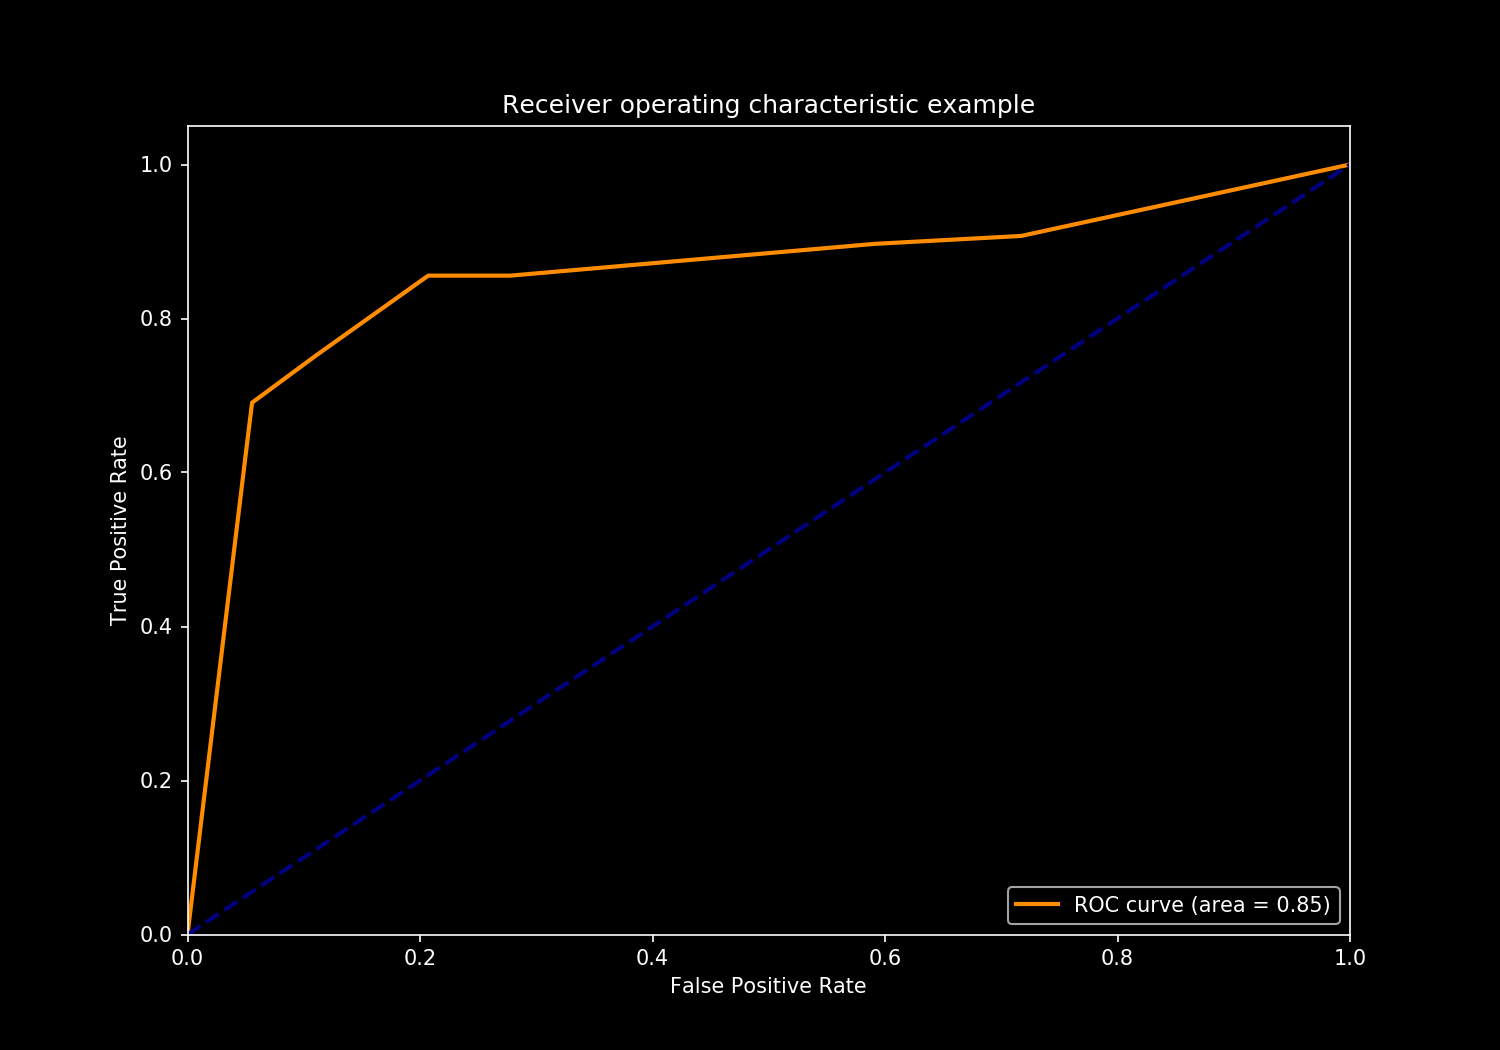

In [105]:
from sklearn.metrics import roc_curve, auc
lw=2
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [113]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

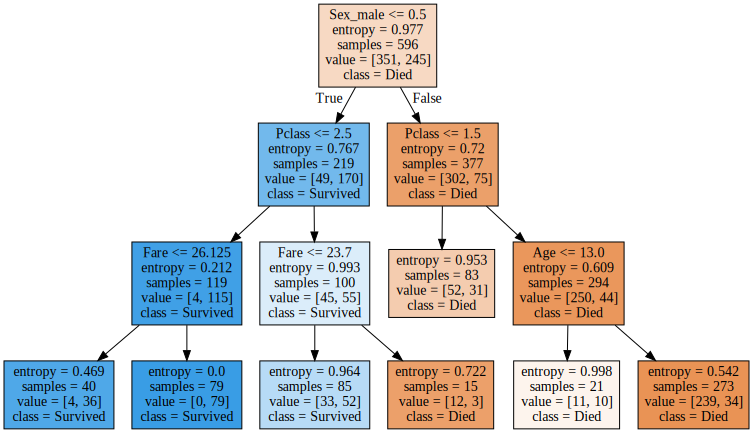

In [114]:
#import os
#os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\graphviz2.38\\bin" 

graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [115]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

In [129]:
params = {'n_estimators':[150,200], 'max_depth':[2,5,7,10,12,14,17]}

grid_s = GridSearchCV(clf_rf, param_grid=params, cv=5, n_jobs=-1)

In [130]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [132]:
best_clf_rf = grid_s.best_estimator_

In [131]:
grid_s.best_params_

{'max_depth': 7, 'n_estimators': 150}

In [ ]:
cross_val_score()

In [137]:
pred_rf = best_clf_rf.predict(X_test)

print(f'Precision: {precision_score(y_test,pred_rf)}, \nRecall: {recall_score(y_test, pred_rf)}\nAccuracy: {cross_val_score(clf, X_test,y_test,cv=5).mean():0.2f}')

Precision: 0.7684210526315789, 
Recall: 0.7525773195876289
Accuracy: 0.78


In [138]:
pred_rf_proba = best_clf_rf.predict_proba(X_test)

In [167]:
!cd

D:\Kaggle\Titanic


<IPython.core.display.Javascript object>


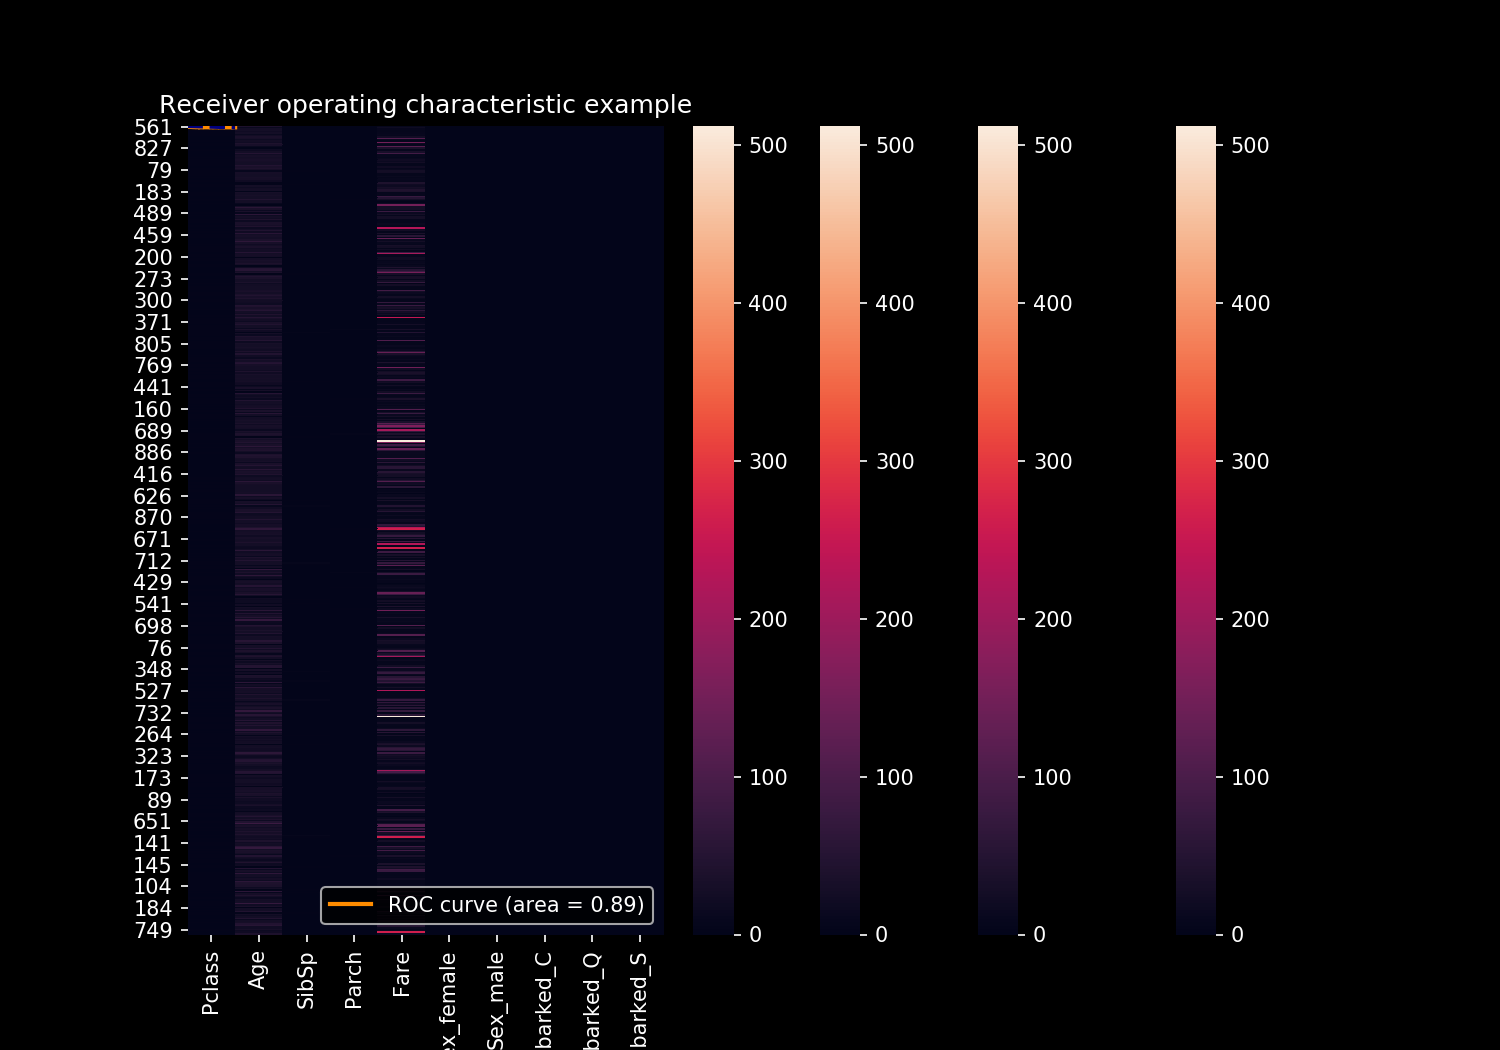

In [139]:
lw=2
fpr, tpr, thresholds = roc_curve(y_test, pred_rf_proba[:, 1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [142]:
sorted(best_clf_rf.feature_importances_)[::-1]

[0.24608450217470523,
 0.2198450313322427,
 0.16846343414766546,
 0.14101389678744994,
 0.10998644646356048,
 0.03759382669951182,
 0.03483410070847907,
 0.01829770660663956,
 0.015331644214131187,
 0.008549410865614698]

In [148]:
feature_importances = best_clf_rf.feature_importances_
feature_importances_df = pd.DataFrame({'features': X_train.columns, 'feature_importances': feature_importances})
feature_importances_df.sort_values(by='feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.246085
5,Sex_female,0.219845
4,Fare,0.168463
1,Age,0.141014
0,Pclass,0.109986
2,SibSp,0.037594
3,Parch,0.034834
7,Embarked_C,0.018298
9,Embarked_S,0.015332
8,Embarked_Q,0.008549
